In [ ]:
%matplotlib inline
!pip install utils
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import math

# setup for printing numpy arrays
np.set_printoptions(precision=2)
plt.style.use('ggplot')
np.set_printoptions(precision=2)
from mpl_toolkits.mplot3d import Axes3D
from utils import *
from scipy.optimize import minimize 
# for advanced optimization
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
import warnings

In [ ]:
#Kanishk edit: To upload the dataset from Prof. Sadeghzadeh local system
path = 'C:/Users/salou/Desktop/Binghamton University/Research/5 Nutrition and Mental Health'
data = pd.read_csv(path+'/Dataset.csv', nrows = 3447)
print(data.shape)

#data = pd.DataFrame(data.to_numpy()[:3447, :25])
#n = data.shape[1] - 1            # number of features
#X = data[:, :-1].reshape(-1, n)  # Get all but the last column and convert to a 2d array
#y = data[:,  -1].reshape(-1, 1)  # Get the last column and convert to a 2d array
#print(X.shape)
#print(y.shape)

(3447, 26)


In [ ]:
#Kanishk edit: to upload dataset file from my local system
#from google.colab import files
#uploaded = files.upload()

In [ ]:
#Kanishk edit: to read default dataset as CSV file
#import pandas as pd
#import io
#data = pd.read_csv(io.BytesIO(uploaded['Dataset.csv']), encoding = "ISO-8859-1")

In [ ]:
pd.set_option('display.max_columns', None)
data.head()

,Timestamp,Day,StudyCode,Gender,Age,Region,Breakfast,WholeGrain,Dairy,Caffeine,Fruit,PlantOmega3,StarchyFood,Meat,Vegetables,Legumes,Fish,ProcessedFood,MultiVitamin,FishOil,Nervous,Hopeless,Restless,Depressed,Useless,Worthless
0,10/30/2019,3.0,A1,Male,18-29,North America,Yes,None,1 time,None,1 time,None,2 times,2 times,1 times,None,None,None,No,No,None of the time,None of the time,A little of the time,None of the time,None of the time,None of the time
1,10/31/2019,4.0,A1,Male,18-29,North America,No,1 time,1 time,None,1 time,None,2 times,1 time,1 times,None,None,1 time,No,No,A little of the time,None of the time,None of the time,None of the time,None of the time,None of the time
2,11/1/2019,5.0,A1,Male,18-29,North America,No,None,1 time,None,1 time,None,1 time,2 times,2 times,None,None,None,No,No,A little of the time,None of the time,None of the time,None of the time,None of the time,None of the time
3,11/2/2019,6.0,A1,Male,18-29,North America,No,None,1 time,None,None,None,2 times,1 time,1 times,None,1 time,1 time,No,No,None of the time,None of the time,None of the time,None of the time,None of the time,None of the time
4,11/4/2019,1.0,A1,Male,18-29,North America,Yes,1 time,1 time,None,1 time,None,2 times,1 time,2 times,1 time,None,None,No,No,None of the time,None of the time,None of the time,None of the time,None of the time,None of the time


In [ ]:
#To see how many NAs we have in the dataset
data.isna().sum()

Timestamp         0
Day               0
StudyCode         1
Gender           37
Age               6
Region            0
Breakfast        11
WholeGrain        2
Dairy             5
Caffeine          4
Fruit             5
PlantOmega3       6
StarchyFood       7
Meat              8
Vegetables       11
Legumes           4
Fish             13
ProcessedFood     4
MultiVitamin     10
FishOil          16
Nervous           6
Hopeless          6
Restless          7
Depressed         6
Useless           5
Worthless         9
dtype: int64

In [ ]:
#Remove NAs
data = data.dropna()
data.shape

(3299, 26)

In [ ]:
#Rename column "Age"
data.rename(columns={'Age ':'Age'}, inplace=True)
data['Age'].value_counts()
data.columns

Index(['Timestamp', 'Day', 'StudyCode', 'Gender', 'Age', 'Region', 'Breakfast',
       'WholeGrain', 'Dairy', 'Caffeine', 'Fruit', 'PlantOmega3',
       'StarchyFood', 'Meat', 'Vegetables', 'Legumes', 'Fish', 'ProcessedFood',
       'MultiVitamin', 'FishOil', 'Nervous', 'Hopeless', 'Restless',
       'Depressed', 'Useless', 'Worthless'],
      dtype='object')

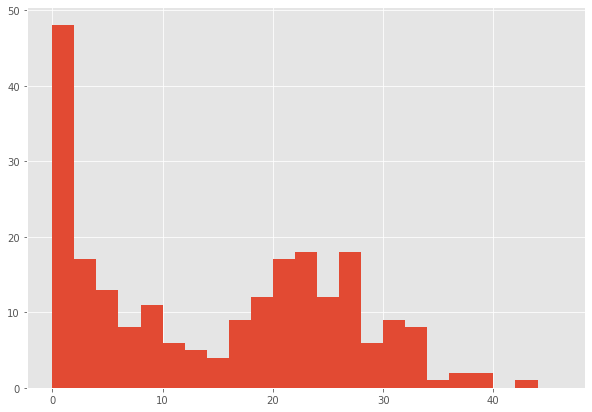

In [ ]:
#To check the number of records per person/study code
dd = data['StudyCode'].value_counts()
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(dd, bins = [0, 2,4,6,8, 10,12,14,16, 18, 20,22,24,26,28,30,32,34,36,38,40,42,44,46])
plt.show()

In [ ]:
#First sort the dataframe with respect to the StudyCode, then delete multiple records for individuals and only keep the original one
data.sort_values(by='StudyCode', ascending=True, inplace=True)
r = 0
lb = 0
for label, row in data.iterrows() :
    if lb>0 and r == row['StudyCode'] :
        data.drop(label, inplace=True)
    lb = label + 1
    r = row['StudyCode']
data.shape 

(227, 26)

In [ ]:
#Check the StudyCode column to confirm the results
dd_new = data['StudyCode'].value_counts()
print(dd_new)

101    1
600    1
F7     1
G1     1
107    1
      ..
2A     1
J8     1
A35    1
A23    1
B2     1
Name: StudyCode, Length: 227, dtype: int64


In [ ]:
#Define binary values for some columns
yn_columns = ['Breakfast', 'MultiVitamin', 'FishOil']
data[yn_columns] = data[yn_columns].replace({"No":0, "Yes":1})
data[yn_columns]

,Breakfast,MultiVitamin,FishOil
2273,1,1,0
2297,1,1,0
2329,1,0,0
2334,0,1,0
2347,0,0,0
...,...,...,...
2971,1,1,0
2997,0,0,0
3120,1,0,0
3144,0,0,0


In [ ]:
#Define a scale of 0-5 for some columns
times_columns = ['WholeGrain','Dairy','Caffeine','Fruit','PlantOmega3','StarchyFood','Meat','Vegetables','Legumes',
       'Fish','ProcessedFood']

data[times_columns] = data[times_columns].replace({"None":0, "1 time":1, "1 times":1, "2 times":2,
                                            "3 times":3, "3 times\xa0":3, "4 times":4, "More than 4 times":5})
data[times_columns]

,WholeGrain,Dairy,Caffeine,Fruit,PlantOmega3,StarchyFood,Meat,Vegetables,Legumes,Fish,ProcessedFood
2273,1,0,0,1,0,1,1,0,0,1,0
2297,1,1,0,0,1,0,2,1,0,0,0
2329,1,1,2,1,0,0,1,0,0,0,0
2334,0,2,1,0,0,0,0,1,1,0,0
2347,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2971,2,1,2,1,0,1,2,0,1,0,0
2997,0,0,0,0,0,0,1,0,0,0,1
3120,0,1,2,0,1,2,0,0,0,0,2
3144,2,2,0,0,0,1,1,1,0,1,0


In [ ]:
#Define a scale of 0-4 for mental health questions
freq_columns = ['Nervous', 'Hopeless','Restless','Depressed','Useless','Worthless']

data[freq_columns] = data[freq_columns].replace({"None of the time":0, "A little of the time":1, "Some of the time":2,
                                            "Most of the time":3, "All the time":4})
data[freq_columns]

,Nervous,Hopeless,Restless,Depressed,Useless,Worthless
2273,0,1,1,0,0,1
2297,0,0,0,0,1,1
2329,0,0,0,0,0,0
2334,1,0,1,0,3,0
2347,2,1,0,0,0,0
...,...,...,...,...,...,...
2971,3,2,2,2,3,1
2997,1,2,2,2,2,2
3120,1,2,2,2,4,1
3144,2,1,2,0,0,2


In [ ]:
#Define categories for different gender and age groups
data["Gender"] = data["Gender"].replace({"Male":0, "Female":1})
data.drop(data.index[data['Gender'] == "Prefer not to say"], inplace=True)
data['Gender'].value_counts()
data["Age"] = data["Age"].replace({"18-29":0, "30-39":1, "40-49":1, "50 and above":2})
data['Age'].value_counts()

0    200
2     18
1      8
Name: Age, dtype: int64

In [ ]:
#Define filters for gender and age
young_filt = data['Age'] == 0
mature_filt = data['Age'] == 1
elderly_filt = data['Age'] == 2
male_filt = data['Gender'] == 'Male'
female_filt = data['Gender'] != 'Male'

In [ ]:
#We use the defined filters to create subset of the dataset if needed later
female_young_data = data[young_filt][female_filt]
female_young_data.describe()
female_young_data.shape

<ipython-input-98-3eefa01c9aba>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_young_data = data[young_filt][female_filt]


(200, 26)

In [ ]:
#Only keep data points with valid values
filt = (data['MultiVitamin'].isin([0,1]) == True) & (data['FishOil'].isin([0,1]) == True)
data = data[filt]
data['MultiVitamin'].value_counts()

0    155
1     70
Name: MultiVitamin, dtype: int64

In [ ]:
#Only keep data points with valid values
filt = data['PlantOmega3'].isin([0,1,2,3,4,5]) == True
data = data[filt]
data['PlantOmega3'].value_counts()

0    146
1     59
2     14
3      1
4      1
5      1
Name: PlantOmega3, dtype: int64

In [ ]:
data.shape

(222, 26)

In [ ]:
#Define one mental health score, which is the sum of 6 scores
data['MentalHealth'] = data['Nervous'] + data['Hopeless'] + data['Restless'] + data['Depressed'] + data['Useless'] + data['Worthless']
data['MentalHealth']
data['MentalHealth'].value_counts()

0     44
1     31
2     27
3     26
4     20
5     17
7     12
8     10
9      9
6      7
11     4
12     4
10     3
13     3
14     2
15     1
18     1
19     1
Name: MentalHealth, dtype: int64

In [ ]:
data['Day']=data['Day'].astype('int')
data['Gender']=data['Gender'].astype('int')
data['Age']=data['Age'].astype('int')
data['Breakfast']=data['Breakfast'].astype('int')
data['WholeGrain']=data['WholeGrain'].astype('int')
data['Dairy']=data['Dairy'].astype('int')
data['Caffeine']=data['Caffeine'].astype('int')
data['Fruit']=data['Fruit'].astype('int')
data['PlantOmega3']=data['PlantOmega3'].astype('int')
data['StarchyFood']=data['StarchyFood'].astype('int')
data['Meat']=data['Meat'].astype('int')
data['Vegetables']=data['Vegetables'].astype('int')
data['Legumes']=data['Legumes'].astype('int')
data['Fish']=data['Fish'].astype('int')
data['ProcessedFood']=data['ProcessedFood'].astype('int')
data['MultiVitamin']=data['MultiVitamin'].astype('int')
data['FishOil']=data['FishOil'].astype('int')

In [ ]:
#X = data[{"Day", "Gender", "Age", "Breakfast", "WholeGrain", "Dairy", "Caffeine", "Fruit", "PlantOmega3", "StarchyFood", 
#         "Meat", "Vegetables", "Legumes", "Fish", "ProcessedFood", "MultiVitamin", "FishOil"}]  
#y = data[["MentalHealth"]]
#n = X.shape[1]           # number of features
#print(X.shape)
#print(y.shape)
#print(n)

In [ ]:
#def plot_data(X, y):
#    plt.figure(figsize=(12, 8), dpi=120)
#    plt.scatter(X, y, s=20, c='r', marker='x', alpha=0.5)
#    plt.xlabel('Other Features')
#    plt.ylabel('Mental Health Score')   
#    plt.title('Mental Health Score vs. Other Features')

In [ ]:
#plot_data(X=data[["Gender"]],y=y)